In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(f"Length of train dataset : {len(x_train)}")
print(f"Length of test dataset : {len(x_test)}")

Length of train dataset : 60000
Length of test dataset : 10000


In [5]:
# Shape of Each Sample
x_train[0].shape

(28, 28)

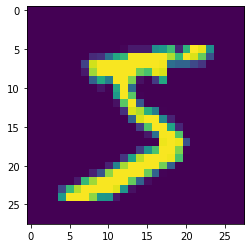

In [6]:
plt.imshow(x_train[0])

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

So we can see here, we have numbers ranging from 0 to 9

###### **So to feed the images into the neural network we need to flatten it and this can be done using "reshape" method.**

In [11]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

As we can see above the values are in the range of 0-255, we can scale the values to get more better result

In [22]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train

In [13]:
# So we can see here, we have 60000 sample in 28*28. After Flattening the output shape must be in (60000, 28*28) or (60000,784)

In [25]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [26]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [27]:
# So after converting the 2D image dimension to a 1D array, we'll build up a simple neural network

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4752 - accuracy: 0.8731
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9251
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9281
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9287
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9306
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [30]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9259


[0.2660697102546692, 0.9258999824523926]

# **Let's Try to Predict on Test Dataset**

In [32]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([4.4962643e-03, 9.6225552e-09, 1.5348527e-02, 9.7388828e-01,
       9.4939390e-04, 1.2884420e-01, 3.0457823e-08, 9.9980539e-01,
       5.9187490e-02, 6.4266568e-01], dtype=float32)

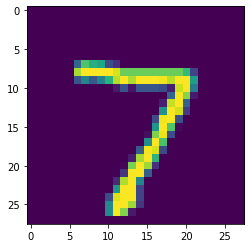

In [33]:
plt.imshow(x_test[0])

In [34]:
# So we can see here, orginally we have '7' in one of our test dataset, let's see what our model has predicted.

In [35]:
np.argmax(y_predicted[0])

7

In [36]:
# So above our model also predicted that the number was 7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

# **Let's plot a confusion matrix out from the test-dataset**

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1106,    4,    2,    0,    1,    4,    2,   16,    0],
       [   6,    6,  929,   18,    8,    3,   12,   10,   36,    4],
       [   3,    0,   15,  933,    0,   15,    3,   10,   23,    8],
       [   1,    1,    6,    2,  900,    0,   12,    5,   11,   44],
       [   9,    2,    3,   47,    9,  766,   14,    9,   27,    6],
       [  14,    3,    6,    1,    7,   12,  912,    1,    2,    0],
       [   2,    6,   20,    7,    7,    1,    0,  946,    3,   36],
       [   9,    5,    7,   23,    8,   19,   11,   11,  872,    9],
       [  11,    7,    1,   13,   19,    5,    0,   20,    3,  930]],
      dtype=int32)>

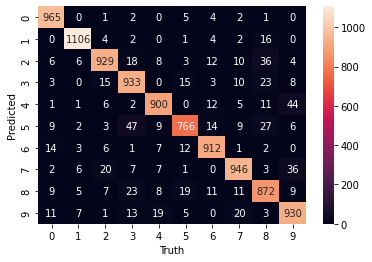

In [44]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.show()

# **Now let us try to add some hidden layers and see the performance of our model.**

In [45]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    # 100 is the number of neurons and must be less than the input shape. i.e. 784
    keras.layers.Dense(10,activation='sigmoid'),
    # Here 10 is the output neurons
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [47]:
model1.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9778


[0.0844920203089714, 0.9778000116348267]

In [48]:
y_predicted = model1.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    0,    2,    3,    2,    2,    1],
       [   0, 1126,    2,    1,    0,    1,    2,    1,    2,    0],
       [   3,    2, 1012,    1,    3,    0,    2,    5,    4,    0],
       [   0,    1,    3,  980,    0,   10,    0,    5,    3,    8],
       [   2,    0,    3,    1,  955,    0,    2,    4,    0,   15],
       [   1,    0,    0,    6,    1,  871,    6,    0,    4,    3],
       [   7,    3,    2,    1,    3,    2,  940,    0,    0,    0],
       [   2,    6,    8,    1,    0,    0,    0, 1004,    1,    6],
       [   7,    0,   10,    5,    6,    4,    3,    3,  932,    4],
       [   2,    2,    0,    3,    6,    3,    0,    4,    0,  989]],
      dtype=int32)>

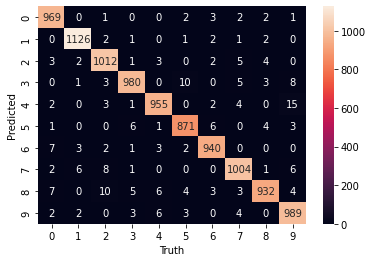

In [49]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.show()